In [1]:
from pyntcloud import PyntCloud
import numpy as np
import os, re
import matplotlib.pyplot as plt
from matplotlib import rcParams

# List available data

In [1]:
print(list(os.listdir("data")))

['img', 'kitti_2011_09_26_drive_0005_0000000030.ply', 'kitti_2011_09_26_drive_0005_0000000030.png', 'kitti_2011_09_26_drive_0005_0000000031.ply', 'kitti_2011_09_26_drive_0005_0000000032.ply', 'kitti_2011_09_26_drive_0005_0000000050.ply', 'kitti_2011_09_26_drive_0005_0000000050.png', 'kitti_2011_09_26_drive_0005_0000000051.ply', 'kitti_2011_09_26_drive_0005_0000000052.ply', 'kitti_2011_09_26_drive_0005_0000000100.ply', 'kitti_2011_09_26_drive_0005_0000000100.png', 'kitti_2011_09_26_drive_0005_0000000101.ply', 'kitti_2011_09_26_drive_0005_0000000102.ply', 'kitti_2011_09_26_drive_0005_0000000120.ply', 'kitti_2011_09_26_drive_0005_0000000120.png', 'kitti_2011_09_26_drive_0005_0000000121.ply', 'kitti_2011_09_26_drive_0005_0000000122.ply', 'kitti_2011_09_26_drive_0005_0000000150.ply', 'kitti_2011_09_26_drive_0005_0000000150.png', 'kitti_2011_09_26_drive_0005_0000000151.ply', 'kitti_2011_09_26_drive_0005_0000000152.ply', 'lidar_data02.pcd', 'lidar_data03.pcd', 'lidar_data03.png', 'README.md']

In [2]:
lidar_cloud = PyntCloud.from_file(os.path.join("data", "lidar_data03.pcd"))
lcpoints = lidar_cloud.points

In [3]:
print("len:", len(lidar_cloud.points))
print("max z:", np.max(lidar_cloud.points.z))
print("min z:", np.min(lidar_cloud.points.z))
print("max intensity =", np.max(lidar_cloud.points.intensity))

len: 32768
max z: 17.402641
min z: -3.3381355
max intensity = 3755.0


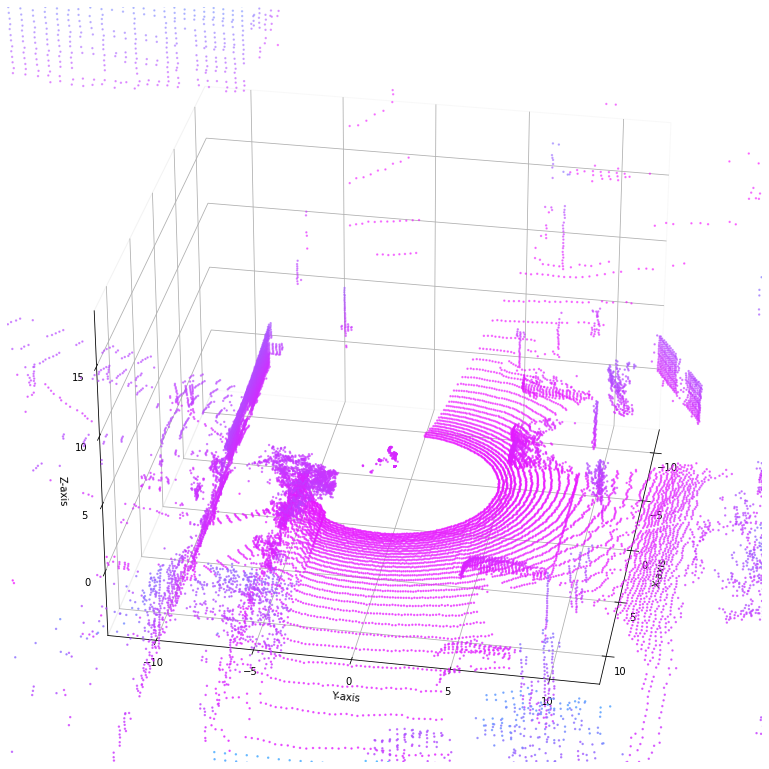

In [4]:
cm1 = plt.cm.get_cmap("cool_r")
cm2 = plt.cm.get_cmap("turbo")
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig1 = plt.figure(figsize=(1000*px, 1000*px))
ax = fig1.add_subplot(111, projection='3d')
ax.scatter(lcpoints.x, lcpoints.y, lcpoints.z, c = lcpoints.z, s=2.0, cmap=cm1)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_xlim3d([-12, 12])
ax.set_ylim3d([-12, 12])
ax.view_init(azim=10)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
plt.show()

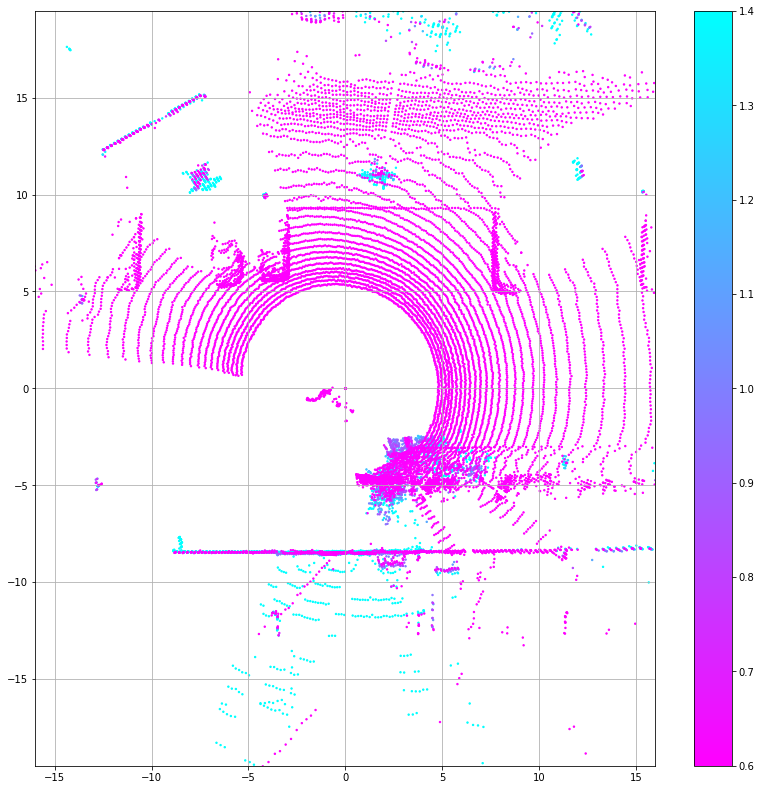

In [5]:
fig2 = plt.figure(figsize=(1000*px, 1000*px))
lcpoints = lcpoints[lcpoints.x > -20].dropna()
lcpoints = lcpoints[lcpoints.x <  20].dropna()
lcpoints = lcpoints[lcpoints.y > -20].dropna()
lcpoints = lcpoints[lcpoints.y <  20].dropna()
plt.scatter(lcpoints.x, lcpoints.y, c = lcpoints.z, vmin=0.6, vmax=1.4, s=2.0, cmap=cm1)
plt.colorbar()
plt.axis('equal')
plt.xlim(-16, 16)
plt.ylim(-16, 16)
plt.grid()
plt.show()

## Remove 0,0,0 elements 
Out of range measurements (e.g. no reflectivity) are collected to `[0,0,0]`, here is an easy way to remove them

Length of the original data is: 27549 and woithout the zeros only: 18034


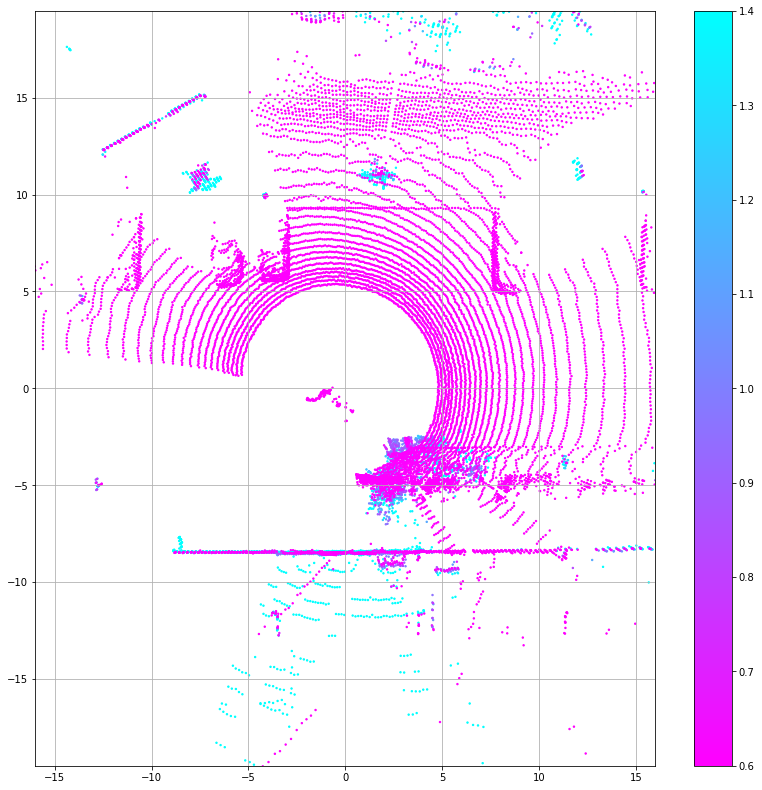

In [26]:
filter_arr = (lcpoints.x > 0.00001) | (lcpoints.x < -0.00001) | (lcpoints.y > 0.00001) | (lcpoints.y < -0.00001)
lcpoints_no_zero = lcpoints[filter_arr]
print("Length of the original data is: %d and woithout the zeros only: %d" % (len(lcpoints), len(lcpoints_no_zero)))
fig3 = plt.figure(figsize=(1000*px, 1000*px))
plt.scatter(lcpoints_no_zero.x, lcpoints_no_zero.y, c = lcpoints_no_zero.z, vmin=0.6, vmax=1.4, s=2.0, cmap=cm1)
plt.colorbar()
plt.axis('equal')
plt.xlim(-16, 16)
plt.ylim(-16, 16)
plt.grid()
plt.show()